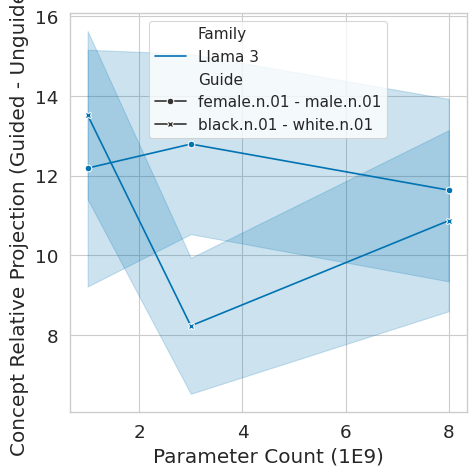

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

df = pd.read_pickle("resources/08_guided_generation_model_comparison.pkl")
df.columns = [s.title() for s in df.columns]

plt.figure(figsize=(5, 5))
sns.lineplot(
    df,
    x=df.columns[3],
    y=df.columns[2],
    hue=df.columns[1],
    style=df.columns[4],
    markers=True,
    dashes=False,
    errorbar=("sd", 0.3),
    palette="colorblind",
)

plt.legend(fontsize=11)
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

df = pd.read_pickle("resources/06_guided_generation_top_k_ablation.pkl")
df.columns = [s.title() for s in df.columns]

HUE = "Model Family"
# df[HUE] = df["Model"].str.extract(r"^([^\s]+\s+[^\s]+)")

plt.figure(figsize=(5, 5))
sns.lineplot(
    df,
    x=df.columns[0],
    y=df.columns[1],
    hue=df.columns[3],
    style=df.columns[2],
    markers=True,
    dashes=False,
    errorbar=("sd", 0.3),
    palette="colorblind",
)

plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig("resources/06_guided_generation_top_k_ablation.png", dpi=400, bbox_inches="tight")

,Token Index,Total Projection,Guidance Level,Guidance
0,0,2.059896,k=3,woman.n.01 - man.n.01
1,0,0.596680,k=3,woman.n.01 - man.n.01
2,0,0.812500,k=3,woman.n.01 - man.n.01
3,0,2.059896,k=3,woman.n.01 - man.n.01
4,0,2.059896,k=3,woman.n.01 - man.n.01
...,...,...,...,...
22523,43,-7.193944,k=1 (no guidance),black.n.01 - white.n.01
22524,43,-38.815159,k=1 (no guidance),black.n.01 - white.n.01
22525,43,-22.415173,k=1 (no guidance),black.n.01 - white.n.01
22526,43,-11.203190,k=1 (no guidance),black.n.01 - white.n.01


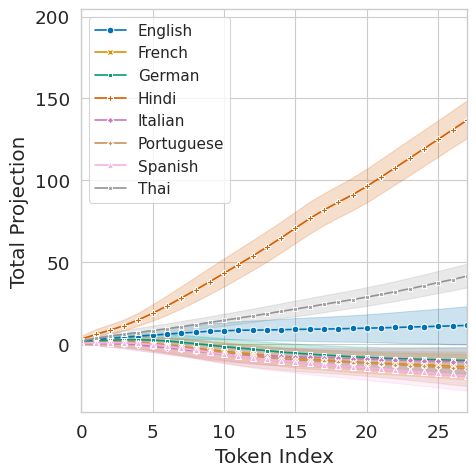

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

df = pd.read_pickle("resources/07_guided_generation_language_ablation.pkl")
df.columns = [s.title() for s in df.columns]

x = df.columns[0]
hue = df.columns[2]

plt.figure(figsize=(5, 5))
sns.lineplot(
    df,
    x=x,
    y=df.columns[1],
    hue=hue,
    style=hue,
    markers=True,
    dashes=False,
    errorbar=("sd", 1),
    palette="colorblind",
)

plt.xlim(0, df.groupby(hue)[x].max().min())
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig("resources/07_guided_generation_language_ablation.png", dpi=400, bbox_inches="tight")